# Recitation: Introduction to PyTorch

### 0. Plan
- Introduce the PyTorch library and the automatic differentiation methods presented in it
- Write multiple machine learning methods using this library

### 1. Google Colab
- Remotely launched Jupyter notebook.
- You can perform calculations on the GPU, TPU, and this is very good in the era of the mining boom (12 hours per session are given).
- Don't forget to select the option to run with GPU.

### 2. PyTorch - NumPy with Automatic Differentiation, GPU Acceleration, ...

#### Peculiarities
- Almost identical to NumPy in working with tensors
- Supports GPU computing
- Supports automatic differentiation
- Gives high-level capabilities for working with neural networks


### 2.1 PyTorch API

In [1]:
import numpy as np
import torch
print(f"Torch version:{torch.__version__}")

print("\nCreate a zero ndarray in NumPy:")
zero_np = np.zeros([2, 3])
print(zero_np)
print("\nCreate a zero tensor in PyTorch:")
zero_pt = torch.zeros([2,3])
print(zero_pt)

Torch version:2.2.0

Create a zero ndarray in NumPy:
[[0. 0. 0.]
 [0. 0. 0.]]

Create a zero tensor in PyTorch:
tensor([[0., 0., 0.],
        [0., 0., 0.]])


You can access elements of tensors in the same way as in the case of Numpy arrays.

In [61]:
print(f" numpy: zero_np[0,1]: {zero_np[0, 1]}\t(type: {type(zero_np[0, 1])})\n")
print(f" torch: zero_pt[0,1]: {zero_pt[0,1]}\t(type: {type(zero_pt[0,1])} / shape: {zero_pt[0,1].shape}\n")
print(f"\tzero_pt[0,1].item(): {zero_pt[0,1].item()}\t(type: {type(zero_pt[0,1].item())}")

 numpy: zero_np[0,1]: 0.0	(type: <class 'numpy.float64'>)

 torch: zero_pt[0,1]: 0.0	(type: <class 'torch.Tensor'> / shape: torch.Size([])

	zero_pt[0,1].item(): 0.0	(type: <class 'float'>


You can conveniently convert Numpy arrays and Torch tensors.

In [3]:
print("Turn a ndarray into a tensor with 'torch.tensor()':")
zero_pt_from_np = torch.tensor(zero_np)
print(zero_pt_from_np)
print("\nor 'torch.from_numpy():'")
zero_pt_from_np = torch.from_numpy(zero_np)
print(zero_pt_from_np)

print("\nTurn a tensor into ndarray with '.numpy()':")
zero_np_from_pt = zero_pt.numpy()
print(zero_np_from_pt)
print(type(zero_np_from_pt))

Turn a ndarray into a tensor with 'torch.tensor()':
tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)
or 'torch.from_numpy():'
tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

Turn a tensor into ndarray with '.numpy()':
[[0. 0. 0.]
 [0. 0. 0.]]
<class 'numpy.ndarray'>


The library structure allows you to mix between calculators using the `.to()` method.


In [4]:
t = torch.randn(2)
print(f"Initial device:\t'{t.device}'")

Initial device:	'cpu'


In [5]:
t = t.to('cuda:0')
print(f"Move to gpu:\t'{t.device}'")

Move to gpu:	'cuda:0'


In [6]:
t = t.to('cpu')
print(f"Back to cpu:\t'{t.device}'")
t.numpy()

Back to cpu:	'cpu'


array([ 1.3494679 , -0.08530663], dtype=float32)

In [7]:
#different devices
t1 = torch.zeros(5).to("cuda")
t2 = torch.zeros(5).to("cpu")

In [8]:
# t1 + t2 ?
t1 + t2

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

Python supports various datatypes - `int`, `float`, `long`, `double` etc.

In [9]:
# types

t = torch.arange(10)
print(f"The type of the created tensors - {t.type()}")

t1 = t.float() #.int() .long() .double()
print(f"The type of the created tensors - {t1.type()}")

The type of the created tensors - torch.LongTensor
The type of the created tensors - torch.FloatTensor


In [10]:
# operations with different types

print(f"The type of the sum {(t + t1).type()}")

The type of the sum torch.FloatTensor


In [16]:
# reshape

t = torch.arange(12)

print(f"The range : \n{t}\n")
print(f"The reshaped tensor : \n{t.view(6, 2)}\n")
print(f"Shape of the reshaped tensor : \n{t.view(6, 2).shape}\n")
print(f"The reshaped tensor : \n{t.view(2, 6)}")


The range : 
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

The reshaped tensor : 
tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])

Shape of the reshaped tensor : 
torch.Size([6, 2])

The reshaped tensor : 
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])


In [17]:
# permute

t = torch.arange(12).view(6, 2)

print(f"The source tensor : \n{t}\n")
print(f"The transposed tensor : \n{t.permute(1, 0)}")


The source tensor : 
tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])

The transposed tensor : 
tensor([[ 0,  2,  4,  6,  8, 10],
        [ 1,  3,  5,  7,  9, 11]])


In [84]:
# transpose

a = torch.arange(12).view(6, 2)

print(a, a.shape)

b = torch.transpose(a, 0, 1)

print(b, b.shape)

c = a.T

print(c, c.shape)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]]) torch.Size([6, 2])
tensor([[ 0,  2,  4,  6,  8, 10],
        [ 1,  3,  5,  7,  9, 11]]) torch.Size([2, 6])
tensor([[ 0,  2,  4,  6,  8, 10],
        [ 1,  3,  5,  7,  9, 11]]) torch.Size([2, 6])


In [18]:
# matrix multiplication

a = torch.arange(12).view(6, 2)
b = torch.arange(12).view(2, 6)


print(f"The torch.matmul() result : \n{torch.matmul(b, a)}\n")
print(f"The @ result : \n{b @ a}\n")
print(f"The torch.einsum result : \n{torch.einsum('ij,jk->ik', b, a)}")

The torch.matmul() result : 
tensor([[110, 125],
        [290, 341]])

The @ result : 
tensor([[110, 125],
        [290, 341]])

The torch.einsum result : 
tensor([[110, 125],
        [290, 341]])


In [19]:
# dot product

a = torch.arange(10)
b = a

print(f"The dot product of the vectors - {a.dot(b)}")
print(f"The dot product of the vectors - {a @ b}")

The dot product of the vectors - 285
The dot product of the vectors - 285


### 3. Automatic differentiation

PyTorch allows you to dynamically create a computation graph that can run efficiently on GPUs.

In [20]:
# chose device automaticaly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

For variables, we can specify whether a gradient should be computed for it using the `requeres_grad` flag.

In [22]:
data = torch.tensor([1.], requires_grad=False)
param = torch.tensor([1.], requires_grad=True)
print('param: ', param, '\ndata: ', data)

param:  tensor([1.], requires_grad=True) 
data:  tensor([1.])


In [23]:
# we can compute gradient only for floats and complex types
data_long = torch.tensor([1], requires_grad=True)

RuntimeError: Only Tensors of floating point and complex dtype can require gradients

In [24]:
# set requires grad

data = data.requires_grad_(True)

print(f"The var data with required grad - {data}")

data = data.requires_grad_(False)

print(f"The var data without required grad - {data}")

The var data with required grad - tensor([1.], requires_grad=True)
The var data without required grad - tensor([1.])


Let's look at how to calculate derivatives using PyTorch using an example function.


$$
f(\mathbf{x}) = ||  A \mathbf{x}  + b - \mathbf{y} ||_2
$$

$$
 \frac{\partial f}{\partial \mathbf{b}} = 2 (A \mathbf{x}  + b - \mathbf{y})
$$

$$
 \frac{\partial f}{\partial \mathbf{x}} = 2 (A \mathbf{x}  + b - \mathbf{y}) A^\top
$$

$$
 \frac{\partial f}{\partial \mathbf{A}} = 2 (A \mathbf{x}  + b - \mathbf{y})x^\top
$$



In [25]:
def f(x, y, A, b):
  return torch.sum((A@x + b  - y)**2)

def dfdb(x, y, A, b):
  return 2*(A@x + b  - y)

def dfdx(x, y, A, b):
  return 2*(A@x + b  - y)@ A.permute(0, 1)

def dfda(x, y, A, b):
  return torch.outer(2*(A@x + b  - y), x)


In [26]:
# variables

x = torch.rand(3, requires_grad=True)
y = torch.rand(3, requires_grad=False)
A = torch.rand((3, 3), requires_grad=True)
b = torch.rand(3, requires_grad=True)

In [27]:
# want to turn off any grad-related computations

with torch.no_grad():
  val = f(x, y, A, b)
  d_b = dfdb(x, y, A, b)
  d_x = dfdx(x, y, A, b)
  d_a = dfda(x, y, A, b)

In [28]:
# what if we try to compute backward when we turn off grad computations

with torch.no_grad():
  val = f(x, y, A, b)
val.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [29]:
val = f(x, y, A, b)
val.backward()

In [30]:
for v, g in zip([x, A, b], [d_x, d_a, d_b]):
  print(torch.norm(v.grad - g))

tensor(0.)
tensor(0.)
tensor(0.)


In [31]:
# can we call backward twice?
val.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [32]:
# what if we do we same thing again?
val = f(x, y, A, b)
val.backward()

In [33]:
for v, g in zip([x, A, b], [d_x, d_a, d_b]):
  print(f"The diff between the autograd and the analytical one \t {torch.norm(v.grad - g)}")
  print(f"Has it been doubled \t {torch.norm(v.grad - 2*g) < 1e-8}")

The diff between the autograd and the analytical one 	 2.7955613136291504
Has it been doubled 	 True
The diff between the autograd and the analytical one 	 2.4144444465637207
Has it been doubled 	 True
The diff between the autograd and the analytical one 	 2.2219696044921875
Has it been doubled 	 True


In [34]:
def set_zero_grad(vars):
  for var in vars:
    if var.grad is not None:
      var.grad.data.zero_()

In [35]:
set_zero_grad([A, b, x, y])

In [36]:
val = f(x, y, A, b)
val.backward()

for v, g in zip([x, A, b], [d_x, d_a, d_b]):
  print(torch.norm(v.grad - g))


tensor(0.)
tensor(0.)
tensor(0.)


Now, we will use PyTorch to implement and train a toy neural network on the FashionMNIST dataset!

## Section 4. DataSet and DataLoader

To build a neural network and its training pipeline, we need to define both the **dataset** and the **model**.

PyTorch provided a utility class `DataSet` and `DataLoader` where we can inherit from and define our own type of dataset.

* `DataSet` - Define the dataset, specifically, provide a data structure that tells
  1. How much data are there in the dataset - `__len__(self) -> int`
  2. What is the `i`-th data in the dataset - `__getitem__(self, int) -> Data`


* `DataLoader` - Given a dataset, how are we going to use these data
  1. Do we want to shuffle it?
  2. Do we want to read them in batch, what is the batch size?

In the toy demo below, we will use the `FashionMNIST` dataset provided in torchvision package.

Specifically, the `datasets.FashionMNIST` is a subclass of `DataSet`

The dataset includes all images in the train and validation set. The dataloader samples the dataset according to the batch size for training and validation. Let's take a look at one of the images in the train set.



In [40]:
# Datasets

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15818180.43it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 270772.79it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5600601.29it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10243015.65it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [99]:
# Dataloaders

from torch.utils.data import DataLoader

batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


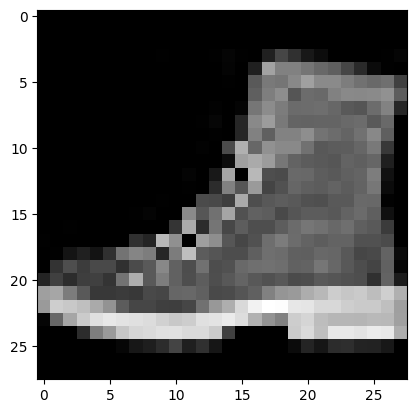

Label: 9


In [43]:
# Display one image

# get batch and labels
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# get image
img = train_features[0].squeeze()
label = train_labels[0]

# plot
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Section 5. Toy Demo on FashionMNIST

Now we're ready to build a neural network using Pytorch. 

For this we will use the modules provided in `torch.nn.` In particular we'll be using `nn.Linear`, which corresponds to a linear layer and `nn.Sigmoid` which applies the sigmoid function to all entries in the tensor element-wise.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

In [44]:
# define a model

class FashionMNISTModel(torch.nn.Module):
  def __init__(self):
    super().__init__()

    self.lin1 = torch.nn.Linear(784, 784)
    self.sigm = torch.nn.Sigmoid()
    self.lin2 = torch.nn.Linear(784, 10)

  def forward(self, x):
    x = self.lin1(x)
    x = self.sigm(x)
    x = self.lin2(x)
    x = self.sigm(x)
    return x


We're now ready to write a training loop for our model. 

First, we need to set some hyperparameters. The number of epochs specifies how many times we'll traverse the training set while the learning rate controls the step size for each gradient descent.

In [95]:
from tqdm import tqdm

# set hyper parameters for training
lr = 0.001
epochs = 10

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

Next, we have to instantiate our model, the stochastic gradient descent optimizer, and the loss function. 

The loss function we'll be using in our case is Cross Entropy loss. Here, we compute the average loss per sample.

In [96]:
# initialize model
model = FashionMNISTModel()
model.to(device)

# initialize optimizer for SGD
optim = torch.optim.SGD(model.parameters(), lr=lr)

# intialize loss metric
loss_func = torch.nn.CrossEntropyLoss(reduction='mean')

Next we can write a loop to iterate through the data to train our model.

In [100]:
def train_loop(model, loader, optimizer, loss_func, epoch, train=False):
    total_loss = 0
    total_correct = 0
    n_samples = 0

    label = 'Training' if train else 'Test'

    for imgs, labels in tqdm(loader, desc=f'{label} Epoch: {epoch}'):
        imgs = imgs.to(device)
        labels = labels.to(device)
        
        # reshape input
        imgs = imgs.reshape(imgs.shape[0], -1)
        # Forward
        out = model(imgs)
        # compute loss
        loss = loss_func(out, labels)
        preds = torch.argmax(out, dim=-1)
        # compute accuracy
        acc = torch.sum(preds == labels)
        
        # Perform gradient descent if we're training
        if train:
            loss.backward()
            optim.step()
        
        # log total loss
        total_loss += imgs.shape[0] * loss
        n_samples += imgs.shape[0]
        total_correct += acc

    return total_loss / n_samples, total_correct / n_samples


Putting it all together, let's train a feed-forward network on the FashionMNIST dataset

In [101]:
test_losses = []
for epoch in range(epochs):
    # set model in training mode
    model.train()
    train_loss, train_acc = train_loop(model, train_dataloader, optim, loss_func, epoch=epoch, train=True)

    # test loop
    # set model in eval mode
    model.eval()
    test_loss, test_acc = train_loop(model, test_dataloader, optim, loss_func, epoch=epoch, train=False)
    test_losses.append(test_loss)

    print(f" Epoch {epoch}: Train loss: {round(train_loss.item(), 4)} |  Train acc: {round(train_acc.item(), 4)} | \
    Test loss: {round(test_loss.item(), 4)} | Test acc: {round(test_acc.item(), 4)}")


Test Epoch: 0: 100%|██████████| 157/157 [00:01<00:00, 115.04it/s]


 Epoch 0: Train loss: 1.6353 |  Train acc: 0.6015 |     Test loss: 1.6412 | Test acc: 0.5973


Test Epoch: 1: 100%|██████████| 157/157 [00:01<00:00, 115.71it/s]


 Epoch 1: Train loss: 1.6335 |  Train acc: 0.6043 |     Test loss: 1.6398 | Test acc: 0.5987


Test Epoch: 2: 100%|██████████| 157/157 [00:01<00:00, 116.33it/s]


 Epoch 2: Train loss: 1.6319 |  Train acc: 0.6065 |     Test loss: 1.6393 | Test acc: 0.6029


Test Epoch: 3: 100%|██████████| 157/157 [00:01<00:00, 116.16it/s]


 Epoch 3: Train loss: 1.6308 |  Train acc: 0.6098 |     Test loss: 1.6379 | Test acc: 0.6079


Test Epoch: 4: 100%|██████████| 157/157 [00:01<00:00, 116.15it/s]


 Epoch 4: Train loss: 1.6298 |  Train acc: 0.613 |     Test loss: 1.6369 | Test acc: 0.6102


Test Epoch: 5: 100%|██████████| 157/157 [00:01<00:00, 115.37it/s]


 Epoch 5: Train loss: 1.6285 |  Train acc: 0.6139 |     Test loss: 1.6364 | Test acc: 0.6109


Test Epoch: 6: 100%|██████████| 157/157 [00:01<00:00, 116.47it/s]


 Epoch 6: Train loss: 1.628 |  Train acc: 0.614 |     Test loss: 1.6356 | Test acc: 0.6108


Test Epoch: 7: 100%|██████████| 157/157 [00:01<00:00, 116.68it/s]


 Epoch 7: Train loss: 1.6274 |  Train acc: 0.6152 |     Test loss: 1.6345 | Test acc: 0.6132


Test Epoch: 8: 100%|██████████| 157/157 [00:01<00:00, 116.18it/s]


 Epoch 8: Train loss: 1.6263 |  Train acc: 0.618 |     Test loss: 1.6335 | Test acc: 0.6152


Test Epoch: 9: 100%|██████████| 157/157 [00:01<00:00, 116.42it/s]

 Epoch 9: Train loss: 1.6258 |  Train acc: 0.6193 |     Test loss: 1.6335 | Test acc: 0.6158


## Section 6. Pytorch model layers

In [68]:
from torch import nn

In [69]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [70]:
# nn.Flatten

flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [71]:
# nn.Linear

layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [72]:
# nn.ReLU

print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.1600, -0.0635,  0.0993,  0.3097,  0.0631,  0.5707, -0.5169,  0.0916,
          0.2628, -0.4495, -0.1384, -0.1456,  0.0898, -0.6089,  0.0443,  0.1155,
          0.0109,  0.1885, -0.4056,  0.1905],
        [-0.1164, -0.2876,  0.4979,  0.2735, -0.0785,  0.4758,  0.2367,  0.1197,
          0.2207, -0.6839, -0.2933,  0.0648, -0.0132, -0.5506, -0.3813,  0.0975,
          0.1826, -0.1126, -0.2642,  0.0660],
        [ 0.2763, -0.2424,  0.2101,  0.4666, -0.2234,  0.3495,  0.0398,  0.2833,
          0.2674, -0.2355, -0.0486,  0.1118, -0.1686, -0.5339, -0.0683, -0.1363,
         -0.2824, -0.1086, -0.1758,  0.0992]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.1600, 0.0000, 0.0993, 0.3097, 0.0631, 0.5707, 0.0000, 0.0916, 0.2628,
         0.0000, 0.0000, 0.0000, 0.0898, 0.0000, 0.0443, 0.1155, 0.0109, 0.1885,
         0.0000, 0.1905],
        [0.0000, 0.0000, 0.4979, 0.2735, 0.0000, 0.4758, 0.2367, 0.1197, 0.2207,
         0.0000, 0.0000, 0.0648, 0.0000, 0.0000, 0.00

In [74]:
# nn.Sequential

seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

print(logits)

tensor([[ 0.0208,  0.3000, -0.1317,  0.0228,  0.1140,  0.2321, -0.1342, -0.0802,
          0.0788, -0.1698],
        [ 0.1352,  0.3810, -0.2974,  0.0056,  0.2092,  0.1296, -0.2769,  0.0120,
          0.1160, -0.2824],
        [ 0.1189,  0.3475, -0.2985,  0.1406,  0.1375,  0.1877, -0.1341, -0.0722,
          0.0238, -0.1583]], grad_fn=<AddmmBackward0>)


In [75]:
# nn.Softmax

softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

print(pred_probab)

tensor([[0.0984, 0.1301, 0.0845, 0.0986, 0.1080, 0.1216, 0.0843, 0.0889, 0.1043,
         0.0813],
        [0.1103, 0.1411, 0.0716, 0.0969, 0.1188, 0.1097, 0.0731, 0.0976, 0.1082,
         0.0727],
        [0.1076, 0.1352, 0.0709, 0.1099, 0.1096, 0.1152, 0.0835, 0.0888, 0.0978,
         0.0815]], grad_fn=<SoftmaxBackward0>)


In [76]:
# Access model information

print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: FashionMNISTModel(
  (lin1): Linear(in_features=784, out_features=784, bias=True)
  (sigm): Sigmoid()
  (lin2): Linear(in_features=784, out_features=10, bias=True)
)


Layer: lin1.weight | Size: torch.Size([784, 784]) | Values : tensor([[-0.0137, -0.0339, -0.0138,  ..., -0.0118,  0.0260, -0.0300],
        [-0.0194, -0.0173, -0.0031,  ...,  0.0309, -0.0106,  0.0166]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: lin1.bias | Size: torch.Size([784]) | Values : tensor([-0.2883,  0.2010], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: lin2.weight | Size: torch.Size([10, 784]) | Values : tensor([[ 0.1413, -2.3227,  1.7530,  ..., -3.1568,  0.4627,  1.8486],
        [-2.4376, -3.7352,  1.6466,  ...,  1.4416,  1.5286,  4.3777]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: lin2.bias | Size: torch.Size([10]) | Values : tensor([-0.7038, -1.5342], device='cuda:0', grad_fn=<SliceBackward0>) 

